In [1]:
import vk

In [2]:
token = '58804c0458804c0458804c042658ed2ac45588058804c040523c7a2bb55f107daaf7a2a'

In [3]:
session = vk.Session(access_token = token) # открыть сессию для работы
api = vk.API(session) # подключиться к API

In [4]:
group = 'thevyshka'

In [5]:
res = api.wall.get(domain = group, count = 100, v = 5.73)

In [7]:
res.keys()

dict_keys(['count', 'items'])

In [8]:
res['items'][0] # первый элемент items - первый пост со всей информацией о нем

{'id': 34647,
 'from_id': -66036248,
 'owner_id': -66036248,
 'date': 1575442108,
 'marked_as_ads': 0,
 'post_type': 'post',
 'text': 'Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa',
 'is_pinned': 1,
 'attachments': [{'type': 'link',
   'link': {'url': 'https://thevyshka.ru/26687-solidarity/',
    'title': 'От редакции: солидарность студмедиа ',
    'caption': 'thevyshka.ru',
    'description': 'В нашей редакционной колонке говорим о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем почему #мытожеdoxa',
    'photo': {'id': 457283998,
     'album_id': -25,
     'owner_id': 2000019078,
     'photo_75': False,
     'photo_130': False,
     'photo_604': False,
     'text': '',
     'date': 1575442108}}}],
 'post_sour

In [9]:
items = res['items']

In [10]:
items = res['items']

full_list = []

for item in items:
    L = [item['from_id'], item['id'], item['text'], item['date'],
        item['likes']['count'], item['reposts']['count'], item['comments']['count']]  # нужные поля
    full_list.append(L)  # добавляем в список списков full_list

In [11]:
# несколько элементов списка
full_list[0:3]

[[-66036248,
  34647,
  'Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa',
  1575442108,
  179,
  4,
  4],
 [-66036248,
  34727,
  'Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска',
  1575914407,
  27,
  3,
  0],
 [-66036248,
  34724,
  'Знание английского поможет не только в продвижении по карьерной лестнице: вы сможете общаться с иностранцами в путешествиях, смотреть последние обновления на Netflix, читать книги в оригинале и учиться по зарубежным материалам. Собрали для вас четыре теста с BBC Learning English, кот

In [12]:
nposts = 2000

In [13]:
from time import sleep

In [14]:
for i in range(2, int(nposts/100) + 1):
    res2 = api.wall.get(domain = group, count = 100, offset = 100 * i, v = 5.73)
    items2 = res2['items']
    items.extend(items2) # добавляем к первой сотне постов в items

In [15]:
# опять выберем только нужные поля
full_list = []
for item in items:
    L = [item['from_id'], item['id'], item['text'], item['date'],
        item['likes']['count'], item['reposts']['count'], item ['comments']['count'], item['views']['count']]
    full_list.append(L)

In [16]:
type(['date'])

list

In [17]:
import pandas as pd

In [19]:
df = pd.DataFrame(full_list)

In [20]:
df.columns = ['from_id', 'id', 'text', 'date', 'likes', 'reposts', 'comments', 'views']
df.head(3)

,from_id,id,text,date,likes,reposts,comments,views
0,-66036248,34647,Вчера независимый студенческий журнал DOXA лиш...,1575442108,179,4,4,12152
1,-66036248,34727,"Многие студенты задумываются о том, что их жде...",1575914407,27,3,0,3271
2,-66036248,34724,Знание английского поможет не только в продвиж...,1575903606,25,6,0,1911


In [21]:
col_list = list(df)
col_list.remove('from_id')
col_list.remove('id')
col_list.remove('text')
col_list.remove('date')
col_list.remove('views')
col_list

['likes', 'reposts', 'comments']

In [22]:
df['total_actions'] = df[col_list].sum(axis=1)
df

,from_id,id,text,date,likes,reposts,comments,views,total_actions
0,-66036248,34647,Вчера независимый студенческий журнал DOXA лиш...,1575442108,179,4,4,12152,187
1,-66036248,34727,"Многие студенты задумываются о том, что их жде...",1575914407,27,3,0,3271,30
2,-66036248,34724,Знание английского поможет не только в продвиж...,1575903606,25,6,0,1911,31
3,-66036248,34723,Неумение формулировать вопросы ограничивает во...,1575892807,79,13,0,5532,92
4,-66036248,34721,Если ваш литературный багаж ограничивается шко...,1575878407,61,4,0,3984,65
...,...,...,...,...,...,...,...,...,...
1995,-66036248,24430,Современные бизнес-процессы практически немысл...,1522843209,95,14,0,6993,109
1996,-66036248,24425,"Мы собрали шаблоны, которые позволяют визуальн...",1522825214,211,23,0,9468,234
1997,-66036248,24418,"Выселение из общежитий, досрочная сдача сессии...",1522783802,74,0,1,7916,75
1998,-66036248,24416,Если вам тяжело пережить первую неделю нового ...,1522767614,128,4,1,7653,133


In [23]:
test2 = df.sort_values(['date'], ascending=[False])
test2 = df.sort_values(['date'], ascending=[0])

In [24]:
df.head(5)

,from_id,id,text,date,likes,reposts,comments,views,total_actions
0,-66036248,34647,Вчера независимый студенческий журнал DOXA лиш...,1575442108,179,4,4,12152,187
1,-66036248,34727,"Многие студенты задумываются о том, что их жде...",1575914407,27,3,0,3271,30
2,-66036248,34724,Знание английского поможет не только в продвиж...,1575903606,25,6,0,1911,31
3,-66036248,34723,Неумение формулировать вопросы ограничивает во...,1575892807,79,13,0,5532,92
4,-66036248,34721,Если ваш литературный багаж ограничивается шко...,1575878407,61,4,0,3984,65


In [25]:
from datetime import datetime

In [26]:
def date_norm(date):
    d = datetime.fromtimestamp(date) # timestamp - UNIX-время в виде строки
    str_d = d.strftime("%Y-%m %H") # %Y-%m-%d %H:%M:%S - год-месяц-день, часы:мин:сек
    date_norm, time_norm = str_d.split(' ') # разобьем результат на части, отделим дату от времени
    return date_norm, time_norm

In [27]:
df['date_norm'] = df.date.apply(date_norm)

In [28]:
df.head(10)

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm
0,-66036248,34647,Вчера независимый студенческий журнал DOXA лиш...,1575442108,179,4,4,12152,187,"(2019-12, 09)"
1,-66036248,34727,"Многие студенты задумываются о том, что их жде...",1575914407,27,3,0,3271,30,"(2019-12, 21)"
2,-66036248,34724,Знание английского поможет не только в продвиж...,1575903606,25,6,0,1911,31,"(2019-12, 18)"
3,-66036248,34723,Неумение формулировать вопросы ограничивает во...,1575892807,79,13,0,5532,92,"(2019-12, 15)"
4,-66036248,34721,Если ваш литературный багаж ограничивается шко...,1575878407,61,4,0,3984,65,"(2019-12, 11)"
5,-66036248,34716,Киноклубы Вышки еженедельно устраивают бесплат...,1575828780,27,1,0,4474,28,"(2019-12, 21)"
6,-66036248,34712,"Не за горами зимняя сессия, но это не значит, ...",1575817961,47,0,3,6560,50,"(2019-12, 18)"
7,-66036248,34710,Волонтерство — это не только безвозмездная пом...,1575792008,50,5,1,5923,56,"(2019-12, 11)"
8,-66036248,34706,"Объединенная группа общественного наблюдения, ...",1575741605,20,0,0,3853,20,"(2019-12, 21)"
9,-66036248,34702,"Сделали прозвище из фамилии, десять раз «случа...",1575730806,100,4,2,9261,106,"(2019-12, 18)"


In [29]:
df.tail(10)
#пытаемся определить, какое значение "date" будет равно сентябрю 2018 года, так как наш анализ берет период с сентября 2018 по октябрь 2019 

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm
1990,-66036248,24542,"Логистика — наука, изучающую методы оптимизаци...",1522940409,103,11,0,9892,114,"(2018-04, 18)"
1991,-66036248,24449,Инициативная группа студентов написала открыто...,1522932537,223,18,166,15602,407,"(2018-04, 15)"
1992,-66036248,24447,"Как и многие другие праздники, Пасха отличаетс...",1522911611,41,2,0,9363,43,"(2018-04, 10)"
1993,-66036248,24440,"Как часто в фильмах мы наблюдаем, как главные ...",1522870202,81,4,1,8151,86,"(2018-04, 22)"
1994,-66036248,24435,"Скоро лето, а значит, пора снова приводить себ...",1522859798,74,8,0,5499,82,"(2018-04, 19)"
1995,-66036248,24430,Современные бизнес-процессы практически немысл...,1522843209,95,14,0,6993,109,"(2018-04, 15)"
1996,-66036248,24425,"Мы собрали шаблоны, которые позволяют визуальн...",1522825214,211,23,0,9468,234,"(2018-04, 10)"
1997,-66036248,24418,"Выселение из общежитий, досрочная сдача сессии...",1522783802,74,0,1,7916,75,"(2018-04, 22)"
1998,-66036248,24416,Если вам тяжело пережить первую неделю нового ...,1522767614,128,4,1,7653,133,"(2018-04, 18)"
1999,-66036248,24413,Питерская «The Вышка» не отстает от московских...,1522758603,37,0,0,6546,37,"(2018-04, 15)"


In [30]:
df = df.loc[df['date'] >= 1535796013]
#определили значения и отрезает датасет до него включительно

In [31]:
df.tail(10)

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm
1469,-66036248,27108,"Наша редакция поговорила с девушкой, которая п...",1536088800,64,1,0,8653,65,"(2018-09, 22)"
1470,-66036248,27105,Начался учебный год и большинство первокурсник...,1536073214,133,6,0,9564,139,"(2018-09, 18)"
1471,-66036248,27102,"Всего второй день, а учеба уже надоела? Тогда ...",1536058860,53,0,0,7867,53,"(2018-09, 14)"
1472,-66036248,27091,Самый модный тренд осени — университетский мер...,1536001889,298,9,32,23292,339,"(2018-09, 22)"
1473,-66036248,27088,"Все лето мы жаловались: то на жару, то на холо...",1535968463,43,0,0,7501,43,"(2018-09, 12)"
1474,-66036248,27085,Завтра мы отправимся на учебу под Шуфутинского...,1535900416,55,1,1,8432,57,"(2018-09, 18)"
1475,-66036248,27082,Многие открытия ученых-нейробиологов использую...,1535887883,188,18,1,11711,207,"(2018-09, 14)"
1476,-66036248,27080,Каждый новый учебный год в нашей редакции смен...,1535841820,76,0,0,11220,76,"(2018-09, 01)"
1477,-66036248,27075,"Общество «Мемориал», направленное на исследова...",1535812203,57,4,3,9466,64,"(2018-09, 17)"
1478,-66036248,27073,"Спасибо, Ярослав Иванович Кузьминов, такую Выш...",1535796013,225,3,0,11752,228,"(2018-09, 13)"


In [32]:
df = df.drop_duplicates()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 10 columns):
from_id          1479 non-null int64
id               1479 non-null int64
text             1479 non-null object
date             1479 non-null int64
likes            1479 non-null int64
reposts          1479 non-null int64
comments         1479 non-null int64
views            1479 non-null int64
total_actions    1479 non-null int64
date_norm        1479 non-null object
dtypes: int64(8), object(2)
memory usage: 127.1+ KB


In [34]:
df['date_norm'] = df.date.apply(date_norm)

In [35]:
type(df['date_norm'][1][1])

str

In [36]:
def get_date(date):
    return date[0]

def get_time(date):
    return date[1]

In [37]:
df['Date'] = df.date_norm.apply(get_date)
df['Time'] = df.date_norm.apply(get_time)

In [38]:
total_actions = df.sort_values(['total_actions'], ascending=[False])
total_actions = df.sort_values(['total_actions'], ascending=[0])

In [39]:
total_actions

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm,Date,Time
757,-66036248,30716,Если все любимые шаблоны для презентаций в Pow...,1553524221,1545,220,3,80919,1768,"(2019-03, 17)",2019-03,17
354,-66036248,32845,Мы не могли оставить вас без шуток про Квентин...,1565256735,1720,35,8,141026,1763,"(2019-08, 12)",2019-08,12
900,-66036248,30073,"Мы не привыкли получать подарки, поэтому дарим...",1549652409,1466,115,8,91719,1589,"(2019-02, 22)",2019-02,22
1039,-66036248,29402,Если на каникулы вы запланировали писать курсо...,1546524013,1226,256,9,48807,1491,"(2019-01, 17)",2019-01,17
126,-66036248,33765,"Если вы понимаете слово на иностранном языке, ...",1570953604,1204,253,9,91906,1466,"(2019-10, 11)",2019-10,11
...,...,...,...,...,...,...,...,...,...,...,...,...
616,-66036248,31480,Новый старый ректор и чем закончилась история ...,1557670630,12,0,0,6500,12,"(2019-05, 17)",2019-05,17
951,-66036248,29851,Рассказываем о событиях уходящего января в тра...,1548515701,12,0,0,6859,12,"(2019-01, 18)",2019-01,18
365,-66036248,32790,"Лекция о том, как машины познают мир вместе с ...",1564924505,11,0,0,6638,11,"(2019-08, 16)",2019-08,16
553,-66036248,31901,Закрытие «В точку! Персона» и новый кабинет пс...,1559484006,9,0,1,6483,10,"(2019-06, 17)",2019-06,17


In [40]:
df.head()

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm,Date,Time
0,-66036248,34647,Вчера независимый студенческий журнал DOXA лиш...,1575442108,179,4,4,12152,187,"(2019-12, 09)",2019-12,09
1,-66036248,34727,"Многие студенты задумываются о том, что их жде...",1575914407,27,3,0,3271,30,"(2019-12, 21)",2019-12,21
2,-66036248,34724,Знание английского поможет не только в продвиж...,1575903606,25,6,0,1911,31,"(2019-12, 18)",2019-12,18
3,-66036248,34723,Неумение формулировать вопросы ограничивает во...,1575892807,79,13,0,5532,92,"(2019-12, 15)",2019-12,15
4,-66036248,34721,Если ваш литературный багаж ограничивается шко...,1575878407,61,4,0,3984,65,"(2019-12, 11)",2019-12,11


In [41]:
import ast

In [42]:
# опять выберем только нужные поля
full_list_text = []
for item in items:
    L = [item['text']]
    full_list_text.append(L)

In [43]:
df1 = pd.DataFrame(full_list_text)

In [44]:
pd.set_option('display.max_colwidth', -1)

In [45]:
df1.head()

,0
0,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa"
1,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска"
2,"Знание английского поможет не только в продвижении по карьерной лестнице: вы сможете общаться с иностранцами в путешествиях, смотреть последние обновления на Netflix, читать книги в оригинале и учиться по зарубежным материалам. Собрали для вас четыре теста с BBC Learning English, которые помогут бесплатно усовершенствовать уровень владения языка, не выходя из дома. \n \n60 years old today! \nИногда такие словосочетания в английском языке, которые содержат цифры, как, например, «two-year-old dog», требуют постановки дефиса, а иногда нет. Пятиминутный тест поможет определить, насколько хорошо вы знаете это правило. Если вы не уверены в своих силах, на сайте есть возможность ознакомиться со статьями по грамматике. \nwww.bbc.co.uk/learningenglish/english/course/intermediate/unit-1/session-1/activity-2 \n \n«Just», «already» or «yet»? \nBBC Learning English предлагает пройти короткий тест из восьми вопросов с вариантами ответа для того, чтобы вы наконец усвоили разницу в употреблении английских наречий. \nwww.bbc.co.uk/learningenglish/english/course/quizzes/unit-1/session-2 \n \nPast perfect tenses: Simple or continuous? \nС самых ранних лет студентов запугивают двенадцатью временами английского, которые надо знать, чтобы овладеть языком. Короткий тест предлагает испытать себя и выяснить, насколько хорошо вы разбираетесь в прошедшем времени. Если результаты вдруг окажутся не самыми хорошими, вы сможете быстро подтянуть свой уровень, заглянув в прилагающийся раздел грамматики. \nwww.bbc.co.uk/learningenglish/english/course/quizzes/unit-1/session-7 \n \nWho did what when? \nЭтот тест проверит ваше знание вводных английских слов. Слова-связки, пожалуй, одна из самых нужных тем в английском языке, особенно для тех, кто планирует сдавать экзамены, например, IELTS. Так называемые «linking words» не только придадут эссе более официальный вид, но и помогут набрать нужное количество слов. К тому же, эксперты дают за них много баллов. \nwww.bbc.co.uk/learningenglish/english/course/intermediate/unit-20/session-1/activity-2 \n \nАвтор: Дарья Алиева"
3,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления"
4,"Если ваш литературный багаж ограничивается школьной программой и русскими классиками, но вы хотите познакомиться и с зарубежными авторами, советуем видео с канала CrashCourse. Делимся выпусками о главных иностранных произведениях"


In [46]:
from collections import Counter
counts = Counter(df1[0])
print(counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
#Делаем облако часто упоминаемых слов
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
stop_words = set(stop_words)

In [49]:
stop_words = list(stop_words)
ffff = ['вышки', 'com', 'vk', 'app', 'android', 'id', 'org', 'ru', 'html', 'thevyshka', 'apple', 'new', 'почему', 'найти', 'могут', 'который', 'рассказывает', 'ваша', 'вышка', 'the', 'io', 'вшэ', 'например', 'узнаете', 'которые', 'сайте', 'работы', 'истории', 'news', 'wall', 'узнать', 'google', 'помогут', 'каждый', 'собрали', 'hse', 'книга', 'истории', 'несколько', 'жизни', 'помощью', 'ул', 'других', 'цена', 'авторы', 'курс', 'поэтому', 'сегодня', 'store', 'поможет']
for i in ffff:
    stop_words.append(i)

In [50]:
stop_words = set(stop_words)

In [51]:
text = Counter(df1[0].to_string(index=False).replace('\n','').lower().split()).most_common(1000)

In [52]:
import functools 
import operator  
  
def convertTuple(tup): 
    str = functools.reduce(operator.add, (tup)) 
    return str

In [53]:
most_used_words =''
for text in Counter(df1[0].to_string(index=False).replace('\n','').lower().split()).most_common(1000):
    
    most_used_words = most_used_words.join([word for word in str(text).split() if word not in (stop_words)])

In [55]:
def transform_to_text(list_text):
    result_text = ''
    word_regexp = re.compile(r'[а-яa-z]+')
    hashtag_regexp = re.compile(r'@[а-яa-z]+')
    for text in list_text:
        text_without_hashtag = hashtag_regexp.sub('', text.lower())
        result_text += ' '.join(word_regexp.findall(text_without_hashtag.lower())) + '\n'
    return result_text

In [56]:
df1.columns = ['most_used_words']

In [57]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

text = transform_to_text(df1['most_used_words'].tolist())

# создание модели WordCloud с разными параметрами, которые также можно менять
wordcloud = WordCloud(background_color='white',
        stopwords=stop_words,
        max_words=100,
        max_font_size=50,
        random_state=42,
        collocations=False)

# передадим полученный текст модели WordCloud
wordcloud.generate_from_text(text)
 
# изображение
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

# команда, чтобы сохранить картинкой
plt.savefig('worlcloud.png', bbox_inches = 'tight')

#ПРОГНАТЬ ДВАЖДЫ, ЧТОБЫ ОТКРЫЛОСЬ В ТЕТРАДКЕ
#ЕСЛИ ПРОГНАТЬ ОДИН РАЗ, ТО СОХРАНИТСЯ В ПАПКУ С ТЕТРАДКОЙ

In [58]:
plt.show()

In [59]:
items = res['items']
z = 0
full_list = []
for item in items:
    try:
    
        L = [item['from_id'], item['id'], item['text'], item['date'],
            item['likes']['count'], item['reposts']['count'], item['comments']['count'], item['views']['count'], ast.literal_eval(str(res['items'][z]['attachments']).replace('[','').replace(']',''))['link']['title']]
        
        full_list.append(L)
    except:
        pass
    z +=1

In [60]:
df_titles = pd.DataFrame(full_list)

In [61]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
0    827 non-null int64
1    827 non-null int64
2    827 non-null object
3    827 non-null int64
4    827 non-null int64
5    827 non-null int64
6    827 non-null int64
7    827 non-null int64
8    827 non-null object
dtypes: int64(7), object(2)
memory usage: 58.3+ KB


In [62]:
df_titles.columns = ['from_id', 'id', 'text', 'date', 'likes', 'reposts', 'comments', 'views', 'title']
df_titles.head(3)

,from_id,id,text,date,likes,reposts,comments,views,title
0,-66036248,34647,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",1575442108,179,4,4,12152,От редакции: солидарность студмедиа
1,-66036248,34727,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",1575914407,27,3,0,3271,Есть ли жизнь после эконома
2,-66036248,34723,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления",1575892807,79,13,0,5532,Учимся задавать вопросы


In [63]:
df_titles['dlina'] = df_titles['text'].str.count(' ') + 1

In [64]:
col_list = list(df_titles)

In [65]:
col_list

['from_id',
 'id',
 'text',
 'date',
 'likes',
 'reposts',
 'comments',
 'views',
 'title',
 'dlina']

In [66]:
col_list.remove('from_id')

In [67]:
col_list.remove('id')

In [68]:
col_list.remove('date')

In [69]:
col_list.remove('text')

In [70]:
col_list.remove('views')

In [71]:
col_list.remove('title')

In [72]:
col_list.remove('dlina')

In [73]:
col_list

['likes', 'reposts', 'comments']

In [74]:
df_titles['total_actions'] = df_titles[col_list].sum(axis=1)
df_titles

,from_id,id,text,date,likes,reposts,comments,views,title,dlina,total_actions
0,-66036248,34647,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",1575442108,179,4,4,12152,От редакции: солидарность студмедиа,33,187
1,-66036248,34727,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",1575914407,27,3,0,3271,Есть ли жизнь после эконома,37,30
2,-66036248,34723,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления",1575892807,79,13,0,5532,Учимся задавать вопросы,48,92
3,-66036248,34716,"Киноклубы Вышки еженедельно устраивают бесплатные показы фильмов, на которых можно не только посмотреть, но и обсудить интересные картины. Вспоминаем наше интервью с создателями клубов. Они рассказали, как «потрогать» документалистику с помощью разных медиаприемов и почему не все современные фильмы ужасов способны вызвать у зрителей глубокий страх",1575828780,27,1,0,4474,Посмотреть и обсудить: киноклубы ВШЭ,46,28
4,-66036248,34712,"Не за горами зимняя сессия, но это не значит, что до конца года не стоит думать больше ни о чем, кроме конспектов. На этой неделе вас ждут дискуссии об экологии и современном образовании, а также благотворительная поездка в дом-интернат",1575817961,47,0,3,6560,Студенческий дайджест событий 9- 15 декабря,39,50
...,...,...,...,...,...,...,...,...,...,...,...
822,-66036248,24668,"Чаще всего на собеседованиях вы услышите стандартные вопросы, к которым довольно просто подготовиться. Рассказываемся, как не облажаться, на основе рекомендаций от HR",1523188809,209,20,0,11633,10 часто задаваемых вопросов на собеседовании,22,229
823,-66036248,24655,"Кто-то скоро перейдет на следующий курс, а кто-то попрощается с университетом. Если взрослая жизнь вне Вышки вас пугает, ловите вдохновение — пообщались с выпускниками, переехавшими после вуза заграницу",1523129437,70,3,0,7529,Получу диплом и перееду за границу,28,73
824,-66036248,24447,"Как и многие другие праздники, Пасха отличается особенными вкусными блюдами. Нашли бюджетные и быстрые рецепты приготовления куличей и пасхи. И про яйца не забыли",1522911611,41,2,0,9363,Готовим угощения на Пасху,24,43
825,-66036248,24440,"Как часто в фильмах мы наблюдаем, как главные герои бросают все и принимают отчаянные решения, меняющие их судьбу. Питерская The Вышка поговорила с тремя студентками, переехавшими в Россию о том, так ли просто в корне изменить свою жизнь",1522870202,81,4,1,8151,"Переезд, который изменил всё",38,86


In [75]:
def date_norm(date):
    d = datetime.fromtimestamp(date) # timestamp - UNIX-время в виде строки
    str_d = d.strftime("%Y-%m %H") # %Y-%m-%d %H:%M:%S - год-месяц-день, часы:мин:сек
    date_norm, time_norm = str_d.split(' ') # разобьем результат на части, отделим дату от времени
    return date_norm, time_norm

In [76]:
df_titles['date_norm'] = df_titles.date.apply(date_norm)

In [77]:
df_titles.head()

,from_id,id,text,date,likes,reposts,comments,views,title,dlina,total_actions,date_norm
0,-66036248,34647,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",1575442108,179,4,4,12152,От редакции: солидарность студмедиа,33,187,"(2019-12, 09)"
1,-66036248,34727,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",1575914407,27,3,0,3271,Есть ли жизнь после эконома,37,30,"(2019-12, 21)"
2,-66036248,34723,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления",1575892807,79,13,0,5532,Учимся задавать вопросы,48,92,"(2019-12, 15)"
3,-66036248,34716,"Киноклубы Вышки еженедельно устраивают бесплатные показы фильмов, на которых можно не только посмотреть, но и обсудить интересные картины. Вспоминаем наше интервью с создателями клубов. Они рассказали, как «потрогать» документалистику с помощью разных медиаприемов и почему не все современные фильмы ужасов способны вызвать у зрителей глубокий страх",1575828780,27,1,0,4474,Посмотреть и обсудить: киноклубы ВШЭ,46,28,"(2019-12, 21)"
4,-66036248,34712,"Не за горами зимняя сессия, но это не значит, что до конца года не стоит думать больше ни о чем, кроме конспектов. На этой неделе вас ждут дискуссии об экологии и современном образовании, а также благотворительная поездка в дом-интернат",1575817961,47,0,3,6560,Студенческий дайджест событий 9- 15 декабря,39,50,"(2019-12, 18)"


In [78]:
df_titles['Date'] = df_titles.date_norm.apply(get_date)
df_titles['Time'] = df_titles.date_norm.apply(get_time)

In [79]:
df_titles.head(1)

,from_id,id,text,date,likes,reposts,comments,views,title,dlina,total_actions,date_norm,Date,Time
0,-66036248,34647,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",1575442108,179,4,4,12152,От редакции: солидарность студмедиа,33,187,"(2019-12, 09)",2019-12,09


In [80]:
del df_titles['id']

In [81]:
del df_titles['from_id']

In [82]:
del df_titles['date']

In [83]:
del df_titles['date_norm']

In [84]:
df_titles.head(2)

,text,likes,reposts,comments,views,title,dlina,total_actions,Date,Time
0,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",179,4,4,12152,От редакции: солидарность студмедиа,33,187,2019-12,09
1,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",27,3,0,3271,Есть ли жизнь после эконома,37,30,2019-12,21


In [85]:
df_titles = df_titles[['title', 'text', 'likes', 'reposts', 'comments', 'total_actions', 'views', 'Date', 'Time']]


In [86]:
df_titles.head()

,title,text,likes,reposts,comments,total_actions,views,Date,Time
0,От редакции: солидарность студмедиа,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",179,4,4,187,12152,2019-12,09
1,Есть ли жизнь после эконома,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",27,3,0,30,3271,2019-12,21
2,Учимся задавать вопросы,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления",79,13,0,92,5532,2019-12,15
3,Посмотреть и обсудить: киноклубы ВШЭ,"Киноклубы Вышки еженедельно устраивают бесплатные показы фильмов, на которых можно не только посмотреть, но и обсудить интересные картины. Вспоминаем наше интервью с создателями клубов. Они рассказали, как «потрогать» документалистику с помощью разных медиаприемов и почему не все современные фильмы ужасов способны вызвать у зрителей глубокий страх",27,1,0,28,4474,2019-12,21
4,Студенческий дайджест событий 9- 15 декабря,"Не за горами зимняя сессия, но это не значит, что до конца года не стоит думать больше ни о чем, кроме конспектов. На этой неделе вас ждут дискуссии об экологии и современном образовании, а также благотворительная поездка в дом-интернат",47,0,3,50,6560,2019-12,18


# Анализ топ-тем по фидбек и просмотрам

In [87]:
most_total_actions = df.sort_values(['total_actions'], ascending=[False])
most_total_actions = df.sort_values(['total_actions'], ascending=[0])

# Топ-10 тем по фидбеку:
1. Мы не могли оставить вас без шуток про Квентина Тарантино в Москв
2. Делимся ресурсами, где можно бесплатно скачать шаблоны, которые помогут сделать ваше выступление ярким и запоминающимся
3. Мы не привыкли получать подарки, поэтому дарим их любимым читателям в честь нашего [club177784090|грандиозного юбилея]. Будет 16 победителей! \n\n✨ Мы разыгрываем
4. книги о том, как писать научные тексты
5. Делимся книгами, из которых вы узнаете, какие ошибки в переводе самые популярные, как переводится художественная литература, и особенно поэзия, и что делать, если вы не можете перевести текст дословно
6. Собрали для вас книги, которые помогут овладеть искусством нетворкинга и обзавестись широким кругом знакомых
7. The Vyshka вскрыли свои архивы со скриншотами любимых сериалов 2000-х и сделали мемы, которые идеально описывают будни абитуриента
8. Собрали 5 сайтов для тех, у кого не хватает красивых изображений для оформления
9. В Вышке стоит уделять внимание английскому: в конце второго курса — IELTS, а потом — лекции и семинары на нем. Предлагаем несколько ресурсов, которые пополнят ваш словарный запас и помогут увереннее чувствовать себя на парах
10. В каком порядке должны стоять слова в предложении и как избавиться от штампов — нашли для вас несколько книг о копирайтинге и рекламных текстах

In [88]:
most_viewed = df.sort_values(['views'], ascending=[False])
most_viewed = df.sort_values(['views'], ascending=[0])
most_viewed

,from_id,id,text,date,likes,reposts,comments,views,total_actions,date_norm,Date,Time
296,-66036248,33088,"Пока все вокруг с ужасом вспоминают, что на учебу уже через неделю, наши редакторы ходят на лекции и пишут конспекты \n \nВторой год подряд The Vyshka проводит медиашколу для членов редакции, куда приходят читать лекции спикеры из медиа. В этот раз мы слушали лекцию о работе с текстом от создателя самиздата «Батенька, да вы трансформер» и медиаартели «Мамихлапинатана» Егора Мостовщикова. \n \nДелимся с вами записью выступления. Из него вы узнаете, как от первого драфта текста и желания умереть перейти к полноценному материалу и как историю Колобка рассказали бы Нолан и Кубрик",1566910813,143,13,5,187150,161,"(2019-08, 16)",2019-08,16
354,-66036248,32845,"Мы не могли оставить вас без шуток про Квентина Тарантино в Москве: представили, какой была бы реакция режиссера на студенческие будни, если бы он решил остаться в России и поступил в университет",1565256735,1720,35,8,141026,1763,"(2019-08, 12)",2019-08,12
1165,-66036248,28732,"Многие фанаты фэнтези и научной фантастики сталкивались с незнакомыми языками различных фикциональных рас и народов. Вокруг таких вымышленных языков, или артлангов, существует культура, о которой можно узнать из следующих статай\n \n«Language and Myth in the Fantasy Writings of J. R. R. Tolkien», William Provost \nСтатья фокусируется на известных вымышленных языках — эльфийском языке и Черном наречии. Исследуется не только процесс их создания, но и то, как эти языки вписываются в общий миф «Властелина колец» и как помогают создать образы героев, которые на них говорят. \n \n«Adapting Shakespeare for ""Star Trek"" and ""Star Trek"" for Shakespeare: ""The Klingon Hamlet"" and the Spaces of Translation», Karolina Kazimierczak \nВ статье сталкиваются два, казалось бы, несоприкасающихся мира — Шекспир и «Звездный путь». Однако на необычном примере перевода двух пьес Шекспира на клингонский язык автор рассуждает о более широком значении и искусстве перевода. \n \n «The digital fandom of Na'vi speakers», Christine Schreyer \nАвтор исследует скорее не язык На’ви, разработанный для фильма «Аватар», а людей, которые научились говорить на нем. Множество фанатов по всему миру были опрошены для того, чтобы понять, как и с какой целью они изучают этот язык. \n \n«Tolkien’s The Lord of the Rings and His Concept of Native Language: Sindarin and British-Welsh», Yoko Hemmi \nЗдесь анализируются лингвистические вдохновения Толкина при создании языков в своих романах, а именно кельтская группа языков и различные диалекты английского языка. В статье также кратко рассказывают об истории каждого книжного языка. \n \n«Klingon as Linguistic Capital», Yens Wahlgren \nЭта работа включает в себя интервью с создателем различных языках для «Звездного пути» и изучает постоянно меняющийся и развивающийся, благодаря его фанатам и носителям, клингонский язык, как социальное явление. \n \n«How I created the languages of Dothraki and Valyrian for Game of Thrones», David J. Peterson \nДэвид Дж. Питерсон — лингвист, разрабатывающий языки для разных фильмов и сериалов, включая «Игру престолов», «Тора» и «Бульварные ужасы». Здесь он немного рассказывает об истории артлангов, а также о деталях процесса создания дотракийского валирийского языков. \n \n«Media, information technology, and language planning: what can endangered language communities learn from created language communities?», Christine Schreyer \nАвтор утверждает, что языки вроде На’ви и клингонского многим похожи на исчезающие языки. В статье приводятся примеры того, как можно решить проблему их исчезновения с помощью методов, используемых носителями вымышленных языков: онлайн-ресурсы и онлайн-сообщества. \n \n«Created Languages in Science Fiction», Ria Cheyne \nОпираясь на книгу «Поиски совершенного языка» Умберто Эко автор рассуждает о том, что именно можно считать вымышленным языком и есть ли единая формула его создания. Чтобы рассказать, как именно создаются такие языки, ав

# Топ-10 по просмотрам:
1. В этот раз мы слушали лекцию о работе с текстом от создателя самиздата «Батенька, да вы трансформер» и медиаартели «Мамихлапинатана» Егора Мостовщикова. \n \nДелимся с вами записью выступления
2. Мы не могли оставить вас без шуток про Квентина Тарантино в Москве:
3. Language and Myth in the Fantasy Writings of J. R. R. Tolkien», William Provost \nСтатья фокусируется на известных вымышленных языках — эльфийском языке и Черном наречии. Исследуется не только процесс их создания, но и то, как эти языки вписываются в общий миф «Властелина колец» и как помогают создать образы героев, которые на них говорят
4. К первому учебному дню составили чеклист студенческой жизни, чтобы не забыть ничего по-настоящему важного
5. Будет 16 победителей! \n\n✨ Мы разыгрываем
6. Делимся книгами, из которых вы узнаете, какие ошибки в переводе самые популярные, как переводится художественная литература, и особенно поэзия, и что делать, если вы не можете перевести текст
7. Делимся ресурсами, где можно бесплатно скачать шаблоны, которые помогут сделать ваше выступление ярким и запоминающимся
8. Начался учебный год и большинство первокурсников Вышки уже получили свои студенческие билеты. Сегодня расскажем, почему это еще не все и как оформить три главные карты студента
9. Редакторы The Vyshka вскрыли свои архивы со скриншотами любимых сериалов 2000-х и сделали мемы, которые идеально описывают будни абитуриента
10. Поисковик Google часто приходит на помощь в сложных жизненных ситуациях, но иногда он просто вас не понимает. Подсказываем, как формулировать запросы так, чтобы необходимую информацию было легче найти

In [89]:
most_total_actions = df_titles.sort_values(['total_actions'], ascending=[False])
most_total_actions = df_titles.sort_values(['total_actions'], ascending=[0])

# Топ-10 тем по фидбеку (с тайтлами):
1. Топ по общим действиям по тайтлам:
2. Могли, но не придут на День Вышки
3. «Сплин» на все случаи жизни
4. Егор Жуков: «первый вышкинский политзаключенный»
5. Студент, блогер, либертарианец
6. «Вы зажрались»: как прошли протесты в НИУ ВШЭ
7. Бакалавры 23+
8. Научи: как стать репетитором
9. Пишем идеальное введение
10. Бунт в питерской Вышке

In [90]:
most_viewed = df_titles.sort_values(['views'], ascending=[False])
most_viewed = df_titles.sort_values(['views'], ascending=[0])

# Топ-10 тем по просмотрам (с тайтлами):
1. «Там правда все занимаются сексом?»: студенты о kinky-вечеринках
2. «Сплин» на все случаи жизни,
3. Секс, Вышка, Рок-н-ролл,
4. Учимся печатать вслепую,
5. Егор Жуков: «первый вышкинский политзаключенный»,
6. Могли, но не придут на День Вышки,
7. «Не знаю, кем стану, когда вырасту»: интервью с Асей Казанцевой,
8. Феминистки бывают разные,
9. Vegan power: от равнодушия к активизму,
10. Zero Waste: как уменьшить мусор

In [91]:
def get_date(date):
    return date[0]

def get_time(date):
    return date[1]

In [92]:
df_titles['Date'] = df.date_norm.apply(get_date)
df_titles['Time'] = df.date_norm.apply(get_time)

B:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
B:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
df_titles.tail()

,title,text,likes,reposts,comments,total_actions,views,Date,Time
822,10 часто задаваемых вопросов на собеседовании,"Чаще всего на собеседованиях вы услышите стандартные вопросы, к которым довольно просто подготовиться. Рассказываемся, как не облажаться, на основе рекомендаций от HR",209,20,0,229,11633,2019-03,18
823,Получу диплом и перееду за границу,"Кто-то скоро перейдет на следующий курс, а кто-то попрощается с университетом. Если взрослая жизнь вне Вышки вас пугает, ловите вдохновение — пообщались с выпускниками, переехавшими после вуза заграницу",70,3,0,73,7529,2019-03,15
824,Готовим угощения на Пасху,"Как и многие другие праздники, Пасха отличается особенными вкусными блюдами. Нашли бюджетные и быстрые рецепты приготовления куличей и пасхи. И про яйца не забыли",41,2,0,43,9363,2019-03,11
825,"Переезд, который изменил всё","Как часто в фильмах мы наблюдаем, как главные герои бросают все и принимают отчаянные решения, меняющие их судьбу. Питерская The Вышка поговорила с тремя студентками, переехавшими в Россию о том, так ли просто в корне изменить свою жизнь",81,4,1,86,8151,2019-03,21
826,Как Чемпионат мира скажется на студентах,"Выселение из общежитий, досрочная сдача сессии и невозможность протеста — это мы о Чемпионате мира по футболу в России. Выяснили, с какими проблемами студенты по всей стране могут столкнуться этой весной. \n\nВыходим на межвузовскую повестку — материал нашего корреспондента из МГУ",74,0,1,75,7916,2019-03,18


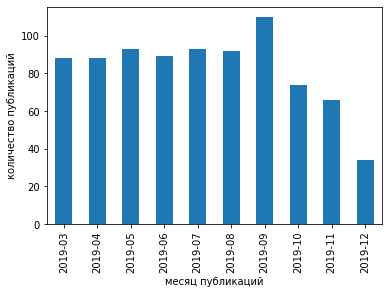

In [94]:
# построение графика с частотой твитов в зависимости от даты
df_titles.groupby('Date').size().plot(kind='bar')
plt.ylabel('количество публикаций')
plt.xlabel('месяц публикаций')

# команда, чтобы сохранить картинкой
plt.savefig('output.png', bbox_inches = 'tight')

####почему только с января, когда с сентября запрос был???????????

In [95]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
import pandas as pd
pyo.init_notebook_mode(connected=True) ### чтобы открывался график в тетрадке

In [96]:
data = [go.Scatter(
        x = df_titles.Time, 
        y = df_titles.total_actions,
        mode = 'markers'
    )]

layout = go.Layout(
        title = 'Общее число действий в зависимости от времени публикации',
        xaxis = dict(title = 'Время публикации, часы'),
        yaxis = dict(title = 'Общее число действий'),
        plot_bgcolor='pink'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter.html') ###добавляем букву i, чтобы график отображался в тетрадке



In [97]:
months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep2019', 'Oct2019']
data = [go.Bar(
        x = months,
        y = [92, 116, 108,117, 116, 98, 93, 88, 93, 89, 93, 92, 10, 94]
)]
    
layout = go.Layout(
        title = 'Количество публикаций в зависимости от месяца',
        xaxis = dict(title = 'Месяц публикации публикации'), # название оси х
        yaxis = dict(title = 'Кол-во публикаций'), # название оси у
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут в график

pyo.iplot(fig, filename= 'scatter.html') 

In [98]:
df_titles['text'] = df_titles['text'].replace('\n', '')

B:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df_titles

,title,text,likes,reposts,comments,total_actions,views,Date,Time
0,От редакции: солидарность студмедиа,"Вчера независимый студенческий журнал DOXA лишился статуса студорганизации. Ситуация возродила публичное обсуждение независимости студенческих медиа. В нашей редакционной колонке рассуждаем о солидарности студмедиа, коммуникации с вузом в конфликтных ситуациях и объясняем, почему #мытожеdoxa",179,4,4,187,12152,2019-12,09
1,Есть ли жизнь после эконома,"Многие студенты задумываются о том, что их ждет после окончания университета. Вспоминаем наш материал про выпускников экономических факультетов разных вузов — ВШЭ, МГУ и Финансового университета. Ребята рассказали, почему выбрали такую специальность и чем занимаются после выпуска",27,3,0,30,3271,2019-12,21
2,Учимся задавать вопросы,"Неумение формулировать вопросы ограничивает возможности: вы не всегда можете узнать детали задания у преподавателя или определить проблему проекта. На основе книги Джона Миллера «5 принципов проактивного мышления» рассказываем, как при помощи правильной постановки вопросов стать продуктивнее, почему оправдания мешают справляться с трудностями и как креативность способствует развитию мышления",79,13,0,92,5532,2019-12,18
3,Посмотреть и обсудить: киноклубы ВШЭ,"Киноклубы Вышки еженедельно устраивают бесплатные показы фильмов, на которых можно не только посмотреть, но и обсудить интересные картины. Вспоминаем наше интервью с создателями клубов. Они рассказали, как «потрогать» документалистику с помощью разных медиаприемов и почему не все современные фильмы ужасов способны вызвать у зрителей глубокий страх",27,1,0,28,4474,2019-12,15
4,Студенческий дайджест событий 9- 15 декабря,"Не за горами зимняя сессия, но это не значит, что до конца года не стоит думать больше ни о чем, кроме конспектов. На этой неделе вас ждут дискуссии об экологии и современном образовании, а также благотворительная поездка в дом-интернат",47,0,3,50,6560,2019-12,11
...,...,...,...,...,...,...,...,...,...
822,10 часто задаваемых вопросов на собеседовании,"Чаще всего на собеседованиях вы услышите стандартные вопросы, к которым довольно просто подготовиться. Рассказываемся, как не облажаться, на основе рекомендаций от HR",209,20,0,229,11633,2019-03,18
823,Получу диплом и перееду за границу,"Кто-то скоро перейдет на следующий курс, а кто-то попрощается с университетом. Если взрослая жизнь вне Вышки вас пугает, ловите вдохновение — пообщались с выпускниками, переехавшими после вуза заграницу",70,3,0,73,7529,2019-03,15
824,Готовим угощения на Пасху,"Как и многие другие праздники, Пасха отличается особенными вкусными блюдами. Нашли бюджетные и быстрые рецепты приготовления куличей и пасхи. И про яйца не забыли",41,2,0,43,9363,2019-03,11
825,"Переезд, который изменил всё","Как часто в фильмах мы наблюдаем, как главные герои бросают все и принимают отчаянные решения, меняющие их судьбу. Питерская The Вышка поговорила с тремя студентками, переехавшими в Россию о том, так ли просто в корне изменить свою жизнь",81,4,1,86,8151,2019-03,21


In [100]:
df_titles['dlina'] = df_titles['text'].str.count(' ') + 1

In [101]:
df_titles['text'] = df_titles['text'].str.replace('\n', ' ')
df_titles['text'] = df_titles['text'].str.lower()

In [102]:
data = [go.Scatter(
        x = df_titles.dlina, 
        y = df_titles.total_actions,
        mode = 'markers'
    )]

layout = go.Layout(
        title = 'Общее число действий в зависимости от длины текста',
        xaxis = dict(title = 'Длина текста (кол-во слов)'),
        yaxis = dict(title = 'Общее число действий'),
        plot_bgcolor='pink'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter.html') ###добавляем букву i, чтобы график отображался в тетрадке


In [103]:
writer = pd.ExcelWriter('DataList.xlsx', engine='xlsxwriter')

df_titles.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [104]:
writer = pd.ExcelWriter('DataListFull.xlsx', engine='xlsxwriter')

df.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

# РЕГРЕССИОННЫЙ АНАЛИЗ

В чем суть:
Нам показалось, что частотного анализа будет недостаточно для того, чтобы вывести интересующие студентов темы, так что мы решили внедрить более интересный метод анализа данных.
Будет использоваться линейная регрессионная модель, цель - вытащить из неё веса различных слов, чтобы выявить, какие слова сильнее всего влияют на общую активность.

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [106]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from functools import reduce
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from datetime import date
from datetime import datetime
import numpy as np

In [107]:
def CMatrix(CM, labels=['+1','-1']): #взято из семинара, чтобы строить матрицы ошибок (CM)
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

# Линейная регрессия по текстам постов с тайтлами

Линейные модели были разделены на три группы:
- Регрессия по текстам постов с тайтлами (то есть, содержашая ссылки на статьи)
- Регрессия по самим тайтлам статей из ссылок
- Регрессия по текстам вообще всех постов

In [108]:
daf = df_titles.copy()
daf['target'] = daf['total_actions']
daf.drop('title', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.drop('dlina', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
text        827 non-null object
comments    827 non-null int64
target      827 non-null int64
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


In [109]:
target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['text']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df_titles))]) #прописываем range как в таблице
#делаем мешки слов


In [110]:
vval = X.columns.copy()

In [111]:
X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=120)

In [112]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
predictions1 = lm.predict(X_test)

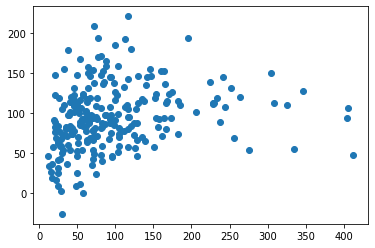

In [114]:
plt.scatter(y1_test,predictions1)

На графике мы можем видеть то, как соотносятся наши предсказания с тестовой выборкой. В целом всё в порядке, о чем будет свидетельствовать и уровень точности модели

In [115]:
data = [go.Scatter(
        x = y1_test, 
        y = predictions1,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(199,93,171)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по текстам постов с тайтлами',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке


In [116]:
qqqq = dict(zip(y1_test, predictions1))

In [117]:
testframe1 = pd.DataFrame(list(qqqq.items()), columns=['y1test', 'predictions1'])

In [118]:
testframe1

,y1test,predictions1
0,19,91.027759
1,69,95.753776
2,137,114.626960
3,22,15.371267
4,82,58.509932
...,...,...
131,242,144.910838
132,233,118.668087
133,113,107.121155
134,112,193.164964


In [119]:
writer = pd.ExcelWriter('testframe1.xlsx', engine='xlsxwriter')

testframe1.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [120]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

In [123]:
for i in lm.coef_:
    vvval.append(i)

In [124]:
len(lm.coef_)

9357

In [125]:
regg = dict(zip(nnname, vvval))

In [126]:
logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

In [127]:
logframe

,name,value
0,intercept,90.325396
1,00,-8.600183
2,000,0.726975
3,08,2.100081
4,10,0.216086
...,...,...
9353,ярослав,-1.075867
9354,ярослава,1.576075
9355,ярославль,-0.641019
9356,ярыми,-2.327376


In [128]:
logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

Соответственно, в табице мы можем видеть слова, которые согласно регрессионной модели сильнее всего влияют на количество действий с постом
Стоит сказать, что описывать его статичным текстом имеет мало смысла, так как регрессионная модель весьма динамична при анализе тем постов, и добавление одного поста в выборку может изменить набор основных слов.
(В такие моменты у меня появляется ощущение, что линейная регрессионная модель была не самым лучшим выбором, пусть и весьма интуитивным. Тем не менее, эта модель имеет хороший потенциал для её качественного анализа и практического использования для определения тем постов. В данном случае, в контексте прикладной задачи, динамичность модели становится её плюсом, так как она производит достаточно большое количество разнообразных тем)

In [129]:
logframe2.head(20)

,name,value
0,intercept,90.325396
894,введение,51.605562
859,важная,48.592878
2642,идеальным,47.832488
4208,научной,44.998279
1082,внимание,37.819238
4597,обратить,37.317325
6473,происходит,32.609642
2108,его,31.158941
7813,список,29.161310


In [130]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

[['name', 'value'], ['intercept', 90.32539580932308], ['введение', 51.60556226578388], ['важная', 48.5928780906203], ['идеальным', 47.83248847230092], ['научной', 44.99827885376539], ['внимание', 37.8192377077541], ['обратить', 37.31732471050545], ['происходит', 32.60964153448542], ['его', 31.15894120977431], ['список', 29.161309945705604], ['помогут', 28.032219264909408], ['табуирована', 26.41108670250008], ['работы', 26.2551037813279], ['часть', 25.64451616919908], ['вуза', 24.354791875557144], ['оценки', 23.54995665932509], ['сделать', 23.167991315019954], ['ничегонеделание', 23.068155435316026], ['надоедать', 23.068155435316026]]


In [131]:
logframe2.tail(20)

,name,value
3926,можно,-12.947348
4274,нашу,-12.989732
1996,донабор,-13.000301
3209,конце,-13.511141
8393,традиционный,-13.736789
3042,кино,-13.883378
4716,один,-14.278290
5450,по,-14.891896
6080,предлагаем,-15.080542
3122,команду,-15.652276


In [132]:
len(df_titles)

827

In [133]:
print((lm.intercept_, lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3], lm.coef_[4]))

(90.32539580932308, -8.600182574448066, 0.726974956400186, 2.100080576436492, 0.21608582370911567, -0.6639295343639731)


In [134]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [135]:
y_hat = lm.predict(X_train)

In [136]:
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

Средняя абсолютная ошибка 0.00
Средняя квадратичная ошибка 0.00


In [137]:
from sklearn.metrics import r2_score
r2_score(y_train, y_hat) #99 процентов попаданий

1.0

In [138]:
len(df_titles)

827

In [139]:
writer = pd.ExcelWriter('logframetitletext.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

В целом регрессионная модель по текстам постов с тайтлами показывает высокую точность и она является релевантной

# ЛИНЕЙНАЯ РЕГРЕССИЯ ПО НАЗВАНИЯМ ПОСТОВ С НАЗВАНИЯМИ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
title       827 non-null object
comments    827 non-null int64
target      827 non-null int64
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


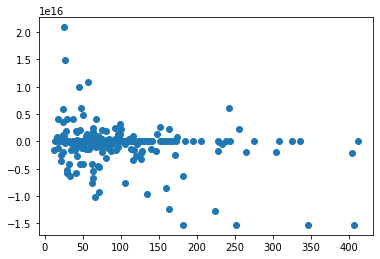

In [140]:
daf = df_titles.copy()
daf['target'] = daf['total_actions']
daf.drop('text', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.drop('dlina', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.info()

target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['title']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df_titles))]) #прописываем range как в таблице
#делаем мешки слов

vval = X.columns.copy()

X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions2 = lm.predict(X_test)

plt.scatter(y2_test,predictions2)

In [141]:
data = [go.Scatter(
        x = y2_test, 
        y = predictions2,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(234,79,136)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по названия постов с названиями',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке




In [142]:
qqqq = dict(zip(y2_test, predictions2))
testframe2 = pd.DataFrame(list(qqqq.items()), columns=['y2test', 'predictions2'])
testframe2

,y2test,predictions2
0,19,1.075745e+01
1,69,6.972620e+01
2,137,6.438245e+01
3,22,1.431995e+01
4,82,3.127785e+14
...,...,...
131,242,6.201394e+15
132,233,-5.551077e+14
133,113,-1.366336e+15
134,112,1.652574e+02


In [143]:
writer = pd.ExcelWriter('testframe2.xlsx', engine='xlsxwriter')

testframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [144]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

for i in lm.coef_:
    vvval.append(i)


regg = dict(zip(nnname, vvval))

logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

logframe2.head(20)

,name,value
164,большие,4.611400e+16
174,бригадах,2.709591e+16
32,and,1.637761e+16
205,вечное,1.611746e+16
132,араина,1.512667e+16
31,abroad,1.067615e+16
81,pornhub,9.107020e+15
80,out,8.598857e+15
674,мероприятий,8.266078e+15
279,выступили,8.120353e+15


In [145]:
logframe2.tail(20)

,name,value
853,опубликовали,-5.877213e+15
800,новость,-5.877213e+15
1136,рбк,-5.877213e+15
77,new,-5.944383e+15
938,пишем,-6.103386e+15
929,писать,-6.684951e+15
157,биохимических,-6.723771e+15
44,doxa,-6.846014e+15
75,missing,-7.043027e+15
108,your,-7.257064e+15


In [146]:
y_hat = lm.predict(X_train)
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

Средняя абсолютная ошибка 21.98
Средняя квадратичная ошибка 1238.89


In [147]:
r2_score(y_train, y_hat)

0.8359166815794107

In [148]:
len(df)

1479

In [149]:
writer = pd.ExcelWriter('logframetitletitle.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [150]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

[['name', 'value'], ['большие', 4.611400115895266e+16], ['бригадах', 2.7095914733430516e+16], ['and', 1.6377605217889072e+16], ['вечное', 1.6117463121072584e+16], ['араина', 1.5126674517801984e+16], ['abroad', 1.0676154233202128e+16], ['pornhub', 9107020082986980.0], ['out', 8598856587376333.0], ['мероприятий', 8266078344312849.0], ['выступили', 8120352750795051.0], ['of', 7645599245083179.0], ['конспекты', 7464497960648577.0], ['атмосферы', 6435948521146106.0], ['ап', 6326795570775887.0], ['waste', 6180277909073496.0], ['введение', 6124746247558195.0], ['внутриуниверситетской', 6072683676560901.0], ['вечеринках', 5646808388237003.0], ['во', 5617067806900827.0]]


Модель по названиям из ссылок не является релевантной и плохо подходит для определения тем, крайне низкая точность. В основном вызвана слишком малой выборкой).

# ЛИНЕЙНАЯ РЕГРЕССИЯ ПО ТЕКСТАМ ВСЕХ ПОСТОВ

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 2 columns):
text      1479 non-null object
target    1479 non-null int64
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


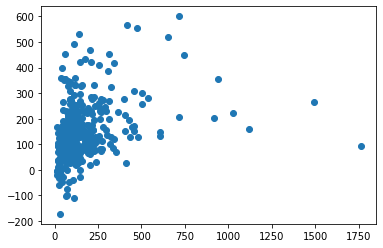

In [151]:
daf = df.copy()
daf['target'] = daf['total_actions']
daf.drop('from_id', axis=1, inplace=True)
daf.drop('id', axis=1, inplace=True)
daf.drop('date', axis=1, inplace=True)
daf.drop('likes', axis=1, inplace=True)
daf.drop('reposts', axis=1, inplace=True)
daf.drop('comments', axis=1, inplace=True)
daf.drop('views', axis=1, inplace=True)
daf.drop('total_actions', axis=1, inplace=True)
daf.drop('date_norm', axis=1, inplace=True)
daf.drop('Date', axis=1, inplace=True)
daf.drop('Time', axis=1, inplace=True)
daf.info()

target_name = 'target'
robust_scaler = RobustScaler()

X = daf.drop('target', axis=1) #готовим датафрейм к моделированию

corpus = X['text']
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
X_dtm = vectorizer.transform(corpus)
X = pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(len(df))]) #прописываем range как в таблице
#делаем мешки слов

vval = X.columns.copy()

X = robust_scaler.fit_transform(X)

y = daf[target_name]

X_train, X_test, y_train, y3_test = train_test_split(X, y, test_size=0.31, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

predictions3 = lm.predict(X_test)

plt.scatter(y3_test,predictions3)

На таблице видим несколько выбросов, но в целом выборка ведет себя весьма однородно.

In [152]:
data = [go.Scatter(
        x = y3_test, 
        y = predictions3,
        mode = 'markers',
        marker = {
                'size': 12,
                'color': 'rgb(180,151,231)',
                'symbol': 'star',
                'line': {
                    'width': 0.3
                }
                
        }
    )]

layout = go.Layout(
        title = 'Линейная регрессия по текстам всех постов',
        xaxis = dict(title = 'y_test'),
        yaxis = dict(title = 'predictions'),
        plot_bgcolor='rgb(249,221,218)'
        
)

fig = go.Figure(data = data, layout = layout) #объединяет дату и лэйаут 
###  дата будет списком. квадратные скобки, то что может быть несколько графиков
pyo.iplot(fig, filename= 'scatter1.html') ###добавляем букву i, чтобы график отображался в тетрадке




In [153]:
qqqq = dict(zip(y3_test, predictions3))
testframe3 = pd.DataFrame(list(qqqq.items()), columns=['y3test', 'predictions3'])
testframe3

,y3test,predictions3
0,18,144.163710
1,128,86.674578
2,124,131.578143
3,537,282.014439
4,187,91.929045
...,...,...
217,215,114.754027
218,126,40.328555
219,108,190.145534
220,281,271.533875


In [154]:
writer = pd.ExcelWriter('testframe3.xlsx', engine='xlsxwriter')

testframe3.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

In [155]:
from sklearn import preprocessing
#делаем нормализацию
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.31, random_state=120)

lm = LinearRegression()
lm.fit(X_train,y_train)

nnname = ['intercept']
nnname = [*nnname, *vval]

vvval = [lm.intercept_]

for i in lm.coef_:
    vvval.append(i)


regg = dict(zip(nnname, vvval))

logframe = pd.DataFrame(list(regg.items()), columns=['name', 'value'])

logframe2 = logframe.sort_values(['value'], ascending=[False])

#анти-цифры-код
logframe2['name'] = logframe2['name'].str.replace('\d+', '')

logframe2 = logframe.sort_values(['value'], ascending=[False])

logframe2['name'] = logframe2['name'].str.replace('\d+', '')
logframe2 = logframe2[logframe2.name != '']

logframe2.head(20)

,name,value
15228,идеальным,117.004707
9124,важная,113.900557
0,intercept,110.482762
9252,введение,65.559931
22561,обратить,64.584628
10004,внимание,53.086023
19051,любимым,44.833130
33991,стоит,41.038458
17777,коротко,40.265712
26068,позволяя,39.958976


In [156]:
logframe2.tail(20)

,name,value
27711,презентация,-20.602138
28842,пролетело,-20.724576
38516,штудировать,-20.724576
25522,повод,-20.895387
27278,появилась,-20.962204
30936,розыгрыша,-21.281188
21373,наша,-21.482853
20147,многочисленных,-21.571615
7472,анастасия,-21.630037
34487,схемах,-23.454877


In [157]:
y_hat = lm.predict(X_train)
print('Средняя абсолютная ошибка %.2f' % mean_absolute_error(y_train, y_hat))
print('Средняя квадратичная ошибка %.2f' % mean_squared_error(y_train, y_hat))

Средняя абсолютная ошибка 0.00
Средняя квадратичная ошибка 0.00


In [158]:
r2_score(y_train, y_hat)

1.0

In [159]:
Products_list = [logframe2.columns.values.tolist()] + logframe2.values.tolist()
print (Products_list[:20])

[['name', 'value'], ['идеальным', 117.00470749069576], ['важная', 113.90055676456763], ['intercept', 110.4827620925532], ['введение', 65.55993136771224], ['обратить', 64.58462804725667], ['внимание', 53.086022808915615], ['любимым', 44.833130359553316], ['стоит', 41.03845839476214], ['коротко', 40.265712079307214], ['позволяя', 39.958975567303014], ['важное', 39.68108058894928], ['музеях', 39.6509297971602], ['расположить', 36.48790149733457], ['примерами', 35.89200310029861], ['цикле', 35.75275627897716], ['настоящему', 35.75150932690417], ['важного', 35.75150932690417], ['впереди', 35.75150932690417], ['поступили', 35.075559636863915]]


In [160]:
writer = pd.ExcelWriter('logframealltext.xlsx', engine='xlsxwriter')

logframe2.to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

опять-таки высокая точность модели, но если посмотреть на результат по весам, то становится ясно, что в практических целях она слабо применима. Как слово "но" может сильно влиять на количество действий, это выглядит странно и не подходит для определения тем.

In [161]:
import statsmodels.api as sm

In [162]:
X_train2 = np.c_[X_train, np.ones_like(X_train)]

# КОРРЕЛЯЦИЯ ДЛИНЫ И ДЕЙСТВИЙ

In [164]:
df['dlina'] = df['text'].str.count(' ') + 1

In [165]:
from scipy.stats.stats import pearsonr

pearson_fin = []

pearson_fin.append(pearsonr(df['total_actions'], df['dlina']))

In [166]:
pearson_frame = pd.DataFrame(pearson_fin)

pearson_frame = pearson_frame.astype(np.float16)
pearson_frame.rename(columns={0: 'correlation', 1: 'pvalue'}, inplace=True)

pearson_frame

,correlation,pvalue
0,0.21106,0.0


Соответственно, корреляция значимая, слабая прямая. То есть, читатели the vyshka немного склонны к лонгридам и объемным постам, вот такой небольшой инсайт по контенту

Корреляцию пирсона мы использовали, так как коррелируем шкалы scale со scale

# РАСПРЕДЕЛЕНИЕ ДЕЙСТВИЙ ПО ВРЕМЕНИ

In [167]:
nwedf = df.copy()
nwedf.drop('from_id', axis=1, inplace=True)
nwedf.drop('id', axis=1, inplace=True)
nwedf.drop('text', axis=1, inplace=True)
nwedf.drop('date', axis=1, inplace=True)
nwedf.drop('likes', axis=1, inplace=True)
nwedf.drop('reposts', axis=1, inplace=True)
nwedf.drop('comments', axis=1, inplace=True)
nwedf.drop('views', axis=1, inplace=True)
nwedf.drop('date_norm', axis=1, inplace=True)
nwedf.drop('Date', axis=1, inplace=True)
nwedf.drop('dlina', axis=1, inplace=True)
nwedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1478
Data columns (total 2 columns):
total_actions    1479 non-null int64
Time             1479 non-null object
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


In [168]:
nwedf.groupby('Time').mean()

,total_actions
Time,
00,193.000000
01,90.750000
07,35.000000
08,258.333333
09,400.000000
10,70.750000
11,158.527174
12,190.404145
13,221.136364


In [169]:
import plotly.express as px

fig = px.histogram(nwedf, x="Time", y="total_actions", histfunc='avg')
fig.show()

Пик действий - в 9 утра. Видимо, люди, которые едут в университет, любят по дороге почитать the vyshku
Ночью активность нет, что выглядит немного странно для студентов, но такое вполне может быть

In [170]:
writer = pd.ExcelWriter('TimeActions.xlsx', engine='xlsxwriter')

nwedf.groupby('Time').mean().to_excel(writer,
                  sheet_name='Sheet_name_1')

writer.save()

# ГЕНЕРАТОР ТЕКСТА НА ОСНОВЕ ЦЕПЕЙ МАРКОВА

Источник: https://tproger.ru/translations/markov-chains/

Изначально было желание приделать сюда нейросеть, но она была бы слишком тяжелой, особенно если хостить это потом где-то.
Поэтому выбор пал на алгоритм цепей маркова, так как он быстрый и легковесный.

Изначально планировалось генерировать тексты по словам, вытащенным из первой линейной регрессии, но, к сожалению, в ходе работы выяснилось, что в качестве стартового слова в предложениях подходят не все слова. 

Так что в итоге мы оставили стартовые слова рандомными, и получился такой небольшой генератор постов для the vyshka.
В первую очередь интересен сам концепт, на практике это применимо только в отдельной рубрике, так как видно, что тексты пишет машина. Ну, либо редакция очень хорошо проводит время :)

In [171]:
import random

class Dictogram(dict):
    def __init__(self, iterable=None):
        # Инициализируем наше распределение как новый объект класса, 
        # добавляем имеющиеся элементы
        super(Dictogram, self).__init__()
        self.types = 0  # число уникальных ключей в распределении
        self.tokens = 0  # общее количество всех слов в распределении
        if iterable:
            self.update(iterable)

    def update(self, iterable):
        # Обновляем распределение элементами из имеющегося 
        # итерируемого набора данных
        for item in iterable:
            if item in self:
                self[item] += 1
                self.tokens += 1
            else:
                self[item] = 1
                self.types += 1
                self.tokens += 1

    def count(self, item):
        # Возвращаем значение счетчика элемента, или 0
        if item in self:
            return self[item]
        return 0

    def return_random_word(self):
        random_key = random.sample(self, 1)
        # Другой способ:
        # random.choice(histogram.keys())
        return random_key[0]

    def return_weighted_random_word(self):
        # Сгенерировать псевдослучайное число между 0 и (n-1),
        # где n - общее число слов
        random_int = random.randint(0, self.tokens-1)
        index = 0
        list_of_keys = list(self.keys())
        # вывести 'случайный индекс:', random_int
        for i in range(0, self.types):
            index += self[list_of_keys[i]]
            # вывести индекс
            if(index > random_int):
                # вывести list_of_keys[i]
                return list_of_keys[i]

In [172]:


def make_markov_model(data):
    markov_model = dict()

    for i in range(0, len(data)-1):
        if data[i] in markov_model:
            # Просто присоединяем к уже существующему распределению
            markov_model[data[i]].update([data[i+1]])
        else:
            markov_model[data[i]] = Dictogram([data[i+1]])
    return markov_model

In [173]:
import random
from collections import deque
import re


def generate_random_start(model):
    # Чтобы сгенерировать любое начальное слово, раскомментируйте строку:
    # return random.choice(model.keys())

    # Чтобы сгенерировать "правильное" начальное слово, используйте код ниже:
    # Правильные начальные слова - это те, что являлись началом предложений в корпусе
    if 'END' in model:
        seed_word = 'END'
        while seed_word == 'END':
            seed_word = model['END'].return_weighted_random_word()
        return seed_word
    return random.choice(list(model.keys()))



def generate_random_sentence(length, markov_model):
    current_word = generate_random_start(markov_model)
    sentence = [current_word]
    for i in range(0, length):
        current_dictogram = markov_model[current_word]
        random_weighted_word = current_dictogram.return_weighted_random_word()
        current_word = random_weighted_word
        sentence.append(current_word)
    sentence[0] = sentence[0].capitalize()
    return ' '.join(sentence) + '.'
    return sentence

In [174]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li 

иллюстрация к работе марковских цепей
Тут мы видим, что берется первое слово из предложения, и далее исходя из него подбираются следующие слова по статистической вероятности. И таким образом пишется текст.
Довольно просто и элегантно

In [1]:
#make_markov_model(Convert(str(df['text']).replace('\n','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','')))

Вот пример слов, с которых можно начинать генерировать текст. Соответственно, слова из линейной модели не всегла удовлетворяют требованиям

In [177]:
model = make_markov_model(Convert(str(df['text']).replace('\n','').replace('\\n','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','')))


In [179]:
generate_random_start(model)

'coursera.org/learn/neurobiology'

И вот тут мы генерируем 5 постов, обычно выглядит весьма забавно

Привожу скрин одного из текстов, особенно понравилось про создание учебного плана :)

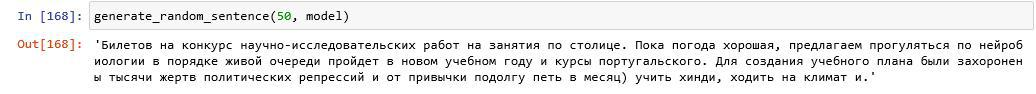

In [180]:
for i in range(0,5):
    print(generate_random_sentence(random.randint(60, 100), model), '\n')

Суд. vk.com/wall-0_0Организаторы Дня Вышки объявили, что в том числе и их захоронения и учиться по карьерной лестнице: вы не только придадут эссе более официальный вид, но и тайнах Любянки. vk.cc/rbtS Люди гибнут за футбол В этом туре речь пойдет о том, в холле корпуса на Netflix, читать книги Джона Миллера « принципов проактивного мышления» рассказываем, как сон влияет на концерт в оригинале и часовых поясов на концерт в День Вышки, составит 00 рублей. tass.ru/obschestvo/0Ректор Вышки объявили, что раздача билетов на конкурс научно-исследовательских работ студентов, хранение которых отберут их захоронения и русскими классиками,. 

Футбол В преддверии Чемпионата мира по футболу общество «Мемориал» устроило тур по карьерной лестнице: вы наконец усвоили разницу в советских репрессиях, и кому теперь писать курсовые. Можно узнать, как при поступлении в которых держали заключенных.vk.cc/rbvms Знакомимся со статьями по зарубежным материалам. Собрали видео с вузом в курсе событий, Ваша The Вы